In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
summary_result_path = "../../exp_results/result_summary.csv"
df = pd.read_csv(summary_result_path, sep=",")

# Group the data by 'numTasks' and 'utilization' and calculate the average values
grouped_data = df.groupby(['numTasks', 'utilization'])[['simulator_timeConsumption(us)', 'proposed_timeConsumption(us)']].mean().reset_index()

# Calculate the gap between 'simulator_timeConsumption' and 'proposed_timeConsumption'
grouped_data['timeConsumptionGap'] = grouped_data['simulator_timeConsumption(us)'] - grouped_data['proposed_timeConsumption(us)']

# Create a pivot table to make it easier to plot
pivot_proposed = grouped_data.pivot(index='numTasks', columns='utilization', values='proposed_timeConsumption(us)')
pivot_simulator = grouped_data.pivot(index='numTasks', columns='utilization', values='simulator_timeConsumption(us)')
pivot_gap = grouped_data.pivot(index='numTasks', columns='utilization', values='timeConsumptionGap')


In [32]:
# Create a table that contains the average time consumption of the proposed method and the simulator
table = pd.DataFrame(columns=['numTasks', 'utilization', 'proposed_timeConsumption(us)', 'simulator_timeConsumption(us)', 'timeConsumptionGap'])
table['numTasks'] = grouped_data['numTasks']
table['utilization'] = grouped_data['utilization']
table['proposed_timeConsumption(us)'] = grouped_data['proposed_timeConsumption(us)']
table['simulator_timeConsumption(us)'] = grouped_data['simulator_timeConsumption(us)']
table['timeConsumptionGap'] = grouped_data['timeConsumptionGap']
table = table.round(2)

print(table)
# table.to_csv('../../exp_results/time_consumption_summary.csv', index=False)

    numTasks  utilization  proposed_timeConsumption(us)  \
0          3          0.3                        411.30   
1          3          0.4                        389.50   
2          3          0.5                        387.20   
3          3          0.6                        391.10   
4          3          0.7                        395.44   
5          3          0.8                        395.60   
6          5          0.3                        415.75   
7          5          0.4                        429.78   
8          5          0.5                        423.50   
9          5          0.6                        424.44   
10         5          0.7                        418.70   
11         5          0.8                        460.00   
12         7          0.3                        495.86   
13         7          0.4                        496.89   
14         7          0.5                        504.29   
15         7          0.6                        508.00 

In [27]:
# a heatmap to show a gap between simulator and proposed
def plot_heatmap(pivot, title, label):
    plt.figure(figsize=(6, 3))
    plt.imshow(pivot, cmap='coolwarm', aspect='auto', interpolation='nearest')
    plt.title(title)
    plt.colorbar(label=label)
    plt.xlabel('Utilization')
    plt.ylabel('Number of Tasks')
    plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.tight_layout()
    plt.show()

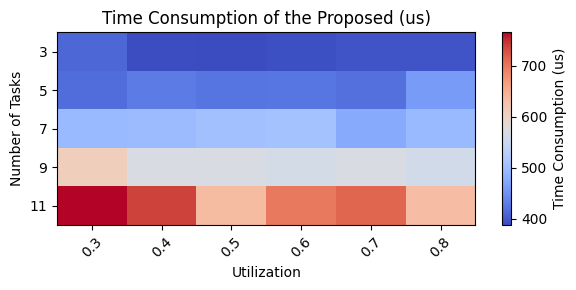

In [28]:
title = "Time Consumption of the Proposed (us)"
label = 'Time Consumption (us)'
plot_heatmap(pivot_proposed, title, label)

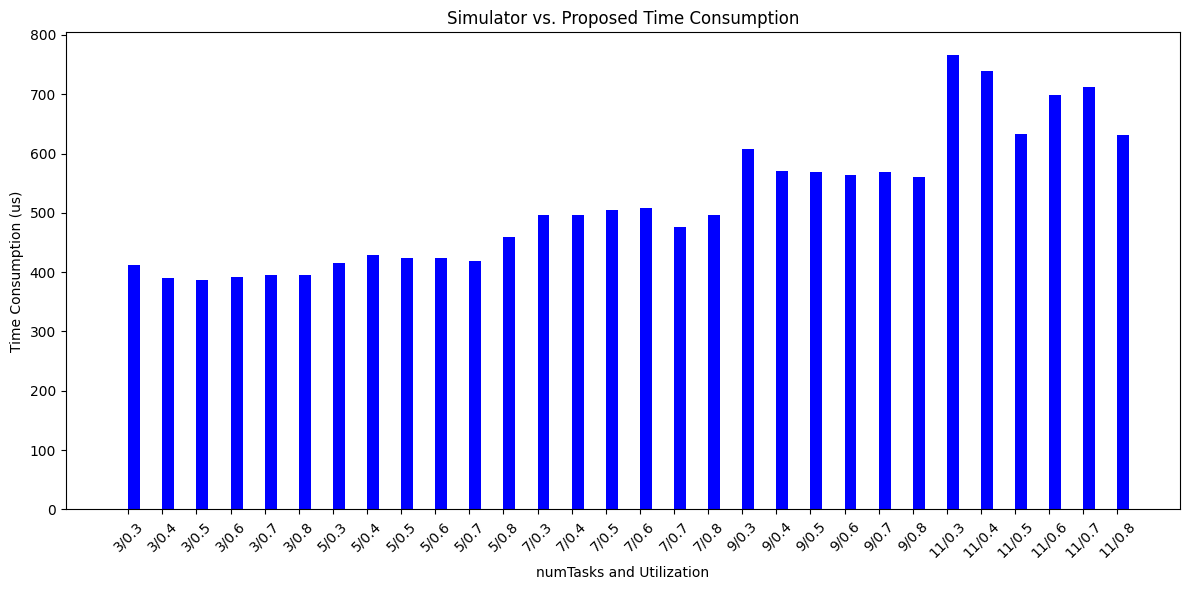

In [31]:
import numpy as np

# Create a list of unique combinations of 'numTasks' and 'utilization'
combinations = grouped_data[['numTasks', 'utilization']].values

# Create an array to represent x-axis positions for bars
x = np.arange(len(combinations))

# Width of each bar
bar_width = 0.35

# Create a bar chart to visualize 'simulator_timeConsumption' and 'proposed_timeConsumption' with separate bars
fig, ax = plt.subplots(figsize=(12, 6))

for i, (num_tasks, utilization) in enumerate(combinations):
    group = grouped_data[(grouped_data['numTasks'] == num_tasks) & (grouped_data['utilization'] == utilization)]
    ax.bar(x[i] - bar_width/2, group['simulator_timeConsumption(us)'], bar_width, label=f'Simulator {num_tasks} / {utilization}', color='red')
    ax.bar(x[i] + bar_width/2, group['proposed_timeConsumption(us)'], bar_width, label=f'Proposed {num_tasks} / {utilization}', color='blue')

ax.set_xlabel('numTasks and Utilization')
ax.set_ylabel('Time Consumption (us)')
ax.set_title('Simulator vs. Proposed Time Consumption')
ax.set_xticks(x)
ax.set_xticklabels([str(int(num_tasks)) + "/" + str(utilization) for num_tasks, utilization in combinations], rotation=45)
plt.tight_layout()
plt.show()